In [6]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from itertools import combinations

In [7]:
df=pd.read_csv('world_data_sin_nulos.csv', index_col=0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [8]:
numericas = df.select_dtypes(include=['int64','float64']).columns
numericas

Index(['density', 'agriculturalland', 'landarea', 'birthrate', 'callingcode',
       'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'urban_population', 'latitude', 'longitude', 'armedforcessize', 'cpi',
       'cpichange', 'gasolineprice', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'minimumwage',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')

In [9]:
for numerica in numericas: 
    media=df[numerica].mean()
    mediana=df[numerica].median()
    desviacion=df[numerica].std()
    minimo=df[numerica].min()
    maximo=df[numerica].max()
    print(f'La columna {numerica} tiene los siguientes valores: media= {media}, mediana= {mediana}, desviación estándar= {desviacion}, mínimo= {minimo}, máximo= {maximo}')
    print('-----------------------------------------------------------------------')

La columna density tiene los siguientes valores: media= 356.7641025641026, mediana= 89.0, desviación estándar= 1982.8889669887628, mínimo= 2.0, máximo= 26337.0
-----------------------------------------------------------------------
La columna agriculturalland tiene los siguientes valores: media= 39.1348717948718, mediana= 39.6, desviación estándar= 21.386637468890402, mínimo= 0.6, máximo= 82.6
-----------------------------------------------------------------------
La columna landarea tiene los siguientes valores: media= 686700.7076923077, mediana= 119511.0, desviación estándar= 1917085.0052104185, mínimo= 0.0, máximo= 17098240.0
-----------------------------------------------------------------------
La columna birthrate tiene los siguientes valores: media= 20.145282051282052, mediana= 17.95, desviación estándar= 9.79861542383212, mínimo= 5.9, máximo= 46.08
-----------------------------------------------------------------------
La columna callingcode tiene los siguientes valores: media=

In [10]:
resultados = df[numericas].agg(['mean', 'median', 'var', 'std', 'max'])
resultados

,density,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
mean,3.567641e+02,39.134872,6.867007e+05,20.145282,360.007692,1.718583e+05,2.681872,32.014872,4.727532e+11,102.473077,21.107179,72.317436,32.567692,1.826205,3.922447e+07,2.185258e+07,19.083026,20.236230,1.631035e+05,186.143676,6.445086,1.019755,38.159984,156.209032,2.670537,62.694104,16.945589,40.815959,6.978307
median,8.900000e+01,39.600000,1.195110e+05,17.950000,255.500000,1.230300e+04,2.245000,32.000000,3.438723e+10,102.550000,14.000000,73.200000,30.700000,1.460000,8.826588e+06,4.678104e+06,17.273849,20.972652,4.000000e+04,125.080000,2.300000,1.002457,34.600000,58.000000,1.560000,62.600000,17.100000,37.700000,5.610000
var,3.931849e+06,457.388262,3.675215e+12,96.012864,103999.805353,6.791354e+11,1.592026,545.603747,4.671696e+24,166.724001,371.920051,53.729179,354.459209,2.739398,2.094808e+16,5.550919e+15,571.224211,4428.098666,1.308030e+11,144792.204427,549.970711,0.129570,809.747823,51084.189791,7.931843,100.776446,44.178840,397.001246,23.765566
std,1.982889e+03,21.386637,1.917085e+06,9.798615,322.490008,8.240967e+05,1.261755,23.358162,2.161411e+12,12.912165,19.285229,7.330019,18.827087,1.655113,1.447345e+08,7.450449e+07,23.900297,66.543960,3.616670e+05,380.515709,23.451454,0.359959,28.456068,226.018118,2.816353,10.038747,6.646717,19.924890,4.874994
max,2.633700e+04,82.600000,1.709824e+07,46.080000,1876.000000,9.893038e+06,6.910000,98.300000,2.142770e+13,142.500000,84.500000,85.400000,81.600000,8.420000,1.397715e+09,8.429340e+08,64.963051,178.065032,3.031000e+06,4583.710000,254.900000,2.000000,136.600000,1150.000000,13.590000,86.800000,37.200000,219.600000,28.180000


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [11]:
condicion=df['density'].max()
resultado=df[df['density']==condicion]['country']
resultado


113    Monaco
Name: country, dtype: object

In [12]:
condicion2=df['population'].min()
resultado2=df[df['population']==condicion2]['country']
resultado2

73    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [13]:
df['birthrate'].mean()

20.145282051282052

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [14]:
def mortalidad(numero):
   
    if numero <10:
        return "Baja"
    
    elif numero >= 10 and numero <= 50:
        return "Moderada"
    
    else:
        return "Alta"

In [15]:
df["infantmortality"].apply(mortalidad)

0      Moderada
1          Baja
2      Moderada
3          Baja
4          Alta
         ...   
190    Moderada
191    Moderada
192    Moderada
193    Moderada
194    Moderada
Name: infantmortality, Length: 195, dtype: object

In [16]:
df["infantmortality_cat"] = df["infantmortality"].apply(mortalidad)
df['infantmortality_cat'].value_counts()

infantmortality_cat
Moderada    101
Baja         73
Alta         21
Name: count, dtype: int64

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [17]:
df_punto5=df[['fertilityrate', 'lifeexpectancy']]
df_punto5.head(3)

,fertilityrate,lifeexpectancy
0,4.47,64.5
1,1.62,78.5
2,3.02,76.7


In [18]:
df_correlaciones=df_punto5.corr( method='spearman')
df_correlaciones

,fertilityrate,lifeexpectancy
fertilityrate,1.00000,-0.83538
lifeexpectancy,-0.83538,1.00000


Correlación fuertemente negativa, de modo que a mayor tasa de fertilidad menor esperanza de vida. 

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución.

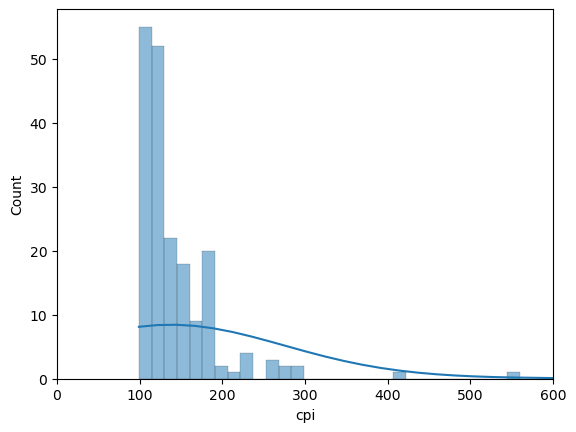

In [19]:
sns.histplot(x='cpi', data=df, kde=True)
plt.xlim(0,600);

In [20]:
df['cpi'].mean()

186.1436757706713

In [21]:
df['cpi'].median()

125.08

Podemos apreciar que los datos están sesgados debido a la presencia de outliers. La mayor concentración de paises se encuentra entre el cpi 100 y 200. 

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [22]:
df.columns


Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'birthrate', 'callingcode', 'capital/majorcity', 'co2-emissions',
       'currency-code', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'largestcity',
       'lifeexpectancy', 'officiallanguage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population', 'urban_population', 'latitude',
       'longitude', 'continent', 'armedforcessize', 'cpi', 'cpichange',
       'gasolineprice', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'minimumwage',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'infantmortality_cat'],
      dtype='object')

In [27]:

df['Difference'] = df['co2-emissions'] - df['gdp']


sorted_df = df.sort_values(by='Difference', ascending=False)


pais_resultado = sorted_df.iloc[0]  

print("País con la mayor diferencia entre CO2 emissions y GDP:")
print(pais_resultado['country'])  
print("Diferencia:", pais_resultado['Difference'])


País con la mayor diferencia entre CO2 emissions y GDP:
Tuvalu
Diferencia: -47271452.0


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [39]:
participacion_promedio = df["populationlaborforceparticipation"].mean()

print(f'la participación promedio es de: {round(participacion_promedio, 2)} %')

la participación promedio es de: 62.69 %


9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [46]:
numericas

Index(['density', 'agriculturalland', 'landarea', 'birthrate', 'callingcode',
       'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'urban_population', 'latitude', 'longitude', 'armedforcessize', 'cpi',
       'cpichange', 'gasolineprice', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'minimumwage',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')

In [45]:
df_numericas = df[numericas]
df_numericas

,density,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
0,60.0,58.1,652230.0,32.49,93.0,8672.0,4.47,2.1,1.910135e+10,104.0,47.9,64.5,78.4,0.28,38041754.0,9797273.0,33.939110,67.709953,323000.0,149.900,2.30,0.70,9.70,638.0,0.430,48.90,9.30,71.40,11.120
1,105.0,43.1,28748.0,11.78,355.0,4536.0,1.62,28.1,1.527808e+10,107.0,7.8,78.5,56.9,1.20,2854191.0,1747593.0,41.153332,20.168331,9000.0,119.050,1.40,1.36,55.00,15.0,1.120,55.70,18.60,36.60,12.330
2,18.0,17.4,2381741.0,24.28,213.0,150006.0,3.02,0.8,1.699882e+11,109.9,20.1,76.7,28.1,1.72,43053054.0,31510100.0,28.033886,1.659626,317000.0,151.360,2.00,0.28,51.40,112.0,0.950,41.20,37.20,66.10,11.700
3,164.0,40.0,468.0,7.20,376.0,469.0,1.27,34.0,3.154058e+09,106.4,2.7,73.2,36.4,3.33,77142.0,67873.0,42.506285,1.521801,22200.0,108.672,0.92,1.51,59.58,169.0,6.630,60.32,18.24,39.48,6.782
4,26.0,47.5,1246700.0,40.73,244.0,34693.0,5.52,46.3,9.463542e+10,113.5,51.6,60.8,33.4,0.21,31825295.0,21061025.0,-11.202692,17.873887,117000.0,261.730,17.10,0.97,9.30,241.0,0.710,77.50,9.20,49.10,6.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912050.0,17.88,58.0,164175.0,2.27,52.7,4.823593e+11,97.2,21.4,72.1,45.8,1.92,28515829.0,25162368.0,6.423750,-66.589730,343000.0,2740.270,254.90,0.00,79.30,125.0,0.010,59.70,20.94,73.30,8.800
191,314.0,39.3,331210.0,16.75,84.0,192668.0,2.05,48.1,2.619212e+11,110.6,16.5,75.3,43.5,0.82,96462106.0,35332140.0,14.058324,108.277199,522000.0,163.520,2.80,0.80,28.50,43.0,0.730,77.40,19.10,37.60,2.010
192,56.0,44.6,527968.0,30.45,967.0,10609.0,3.79,1.0,2.691440e+10,93.6,42.9,66.1,81.0,0.31,29161922.0,10869523.0,15.552727,48.516388,40000.0,157.580,8.10,0.92,10.20,164.0,4.446,38.00,21.14,26.60,12.910
193,25.0,32.1,752618.0,36.19,260.0,5141.0,4.63,65.2,2.306472e+10,98.7,40.4,63.5,27.5,1.19,17861030.0,7871713.0,-13.133897,27.849332,16000.0,212.310,9.20,1.40,4.10,213.0,0.240,74.60,16.20,15.60,11.430


In [ ]:


# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

In [55]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
   
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df_numericas, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('density', 'agriculturalland'), ('density', 'landarea'), ('density', 'birthrate'), ('density', 'callingcode'), ('density', 'co2-emissions'), ('density', 'fertilityrate'), ('density', 'forestedarea'), ('density', 'gdp'), ('density', 'grossprimaryeducationenrollment'), ('density', 'infantmortality'), ('density', 'lifeexpectancy'), ('density', 'outofpockethealthexpenditure'), ('density', 'physiciansperthousand'), ('density', 'population'), ('density', 'urban_population'), ('density', 'latitude'), ('density', 'longitude'), ('density', 'armedforcessize'), ('density', 'cpi'), ('density', 'cpichange'), ('density', 'gasolineprice'), ('density', 'grosstertiaryeducationenrollment'), ('density', 'maternalmortalityratio'), ('density', 'minimumwage'), ('density', 'populationlaborforceparticipation'), ('density', 'taxrevenue'), ('density', 'tot

In [54]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df_numericas.corr(numeric_only = True, method = "spearman")
df_correlaciones

,density,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
density,1.000000,0.147372,-0.575566,-0.261107,-0.026299,-0.004837,-0.254869,-0.115015,-0.005706,0.027640,-0.169117,0.211272,0.008887,0.079924,-0.084865,-0.053442,0.137098,0.080157,0.148590,-0.122680,-0.120813,0.164952,0.029286,-0.112639,0.133612,-0.061998,0.006722,-0.034358,-0.154582
agriculturalland,0.147372,1.000000,0.144762,0.168414,-0.042598,0.074316,0.160531,-0.384844,0.080768,-0.062459,0.193074,-0.215144,0.103314,-0.078544,0.271296,0.232905,0.006225,-0.010557,0.091195,0.185154,0.214210,0.005388,-0.126268,0.154450,-0.172958,-0.135059,-0.073886,0.156477,0.033408
landarea,-0.575566,0.144762,1.000000,0.260225,-0.285017,0.557796,0.241865,-0.135794,0.576958,0.000608,0.209210,-0.188302,0.217933,-0.114266,0.812999,0.758096,-0.050376,0.057418,0.347973,0.309903,0.275242,-0.354331,-0.003842,0.162957,-0.210845,0.001100,-0.345998,0.225024,-0.035172
birthrate,-0.261107,0.168414,0.260225,1.000000,0.162260,-0.416292,0.973552,-0.083542,-0.406423,0.067734,0.890643,-0.845522,0.239035,-0.836584,0.133420,-0.011516,-0.581999,0.041091,-0.128597,0.368876,0.227444,-0.253163,-0.772651,0.810556,-0.521941,0.204301,-0.339598,0.154606,-0.035400
callingcode,-0.026299,-0.042598,-0.285017,0.162260,1.000000,-0.271189,0.160455,-0.080934,-0.354640,-0.065896,0.100981,-0.145160,-0.055086,-0.071644,-0.344703,-0.354550,-0.042181,0.303996,-0.166866,0.079748,-0.002349,-0.137876,-0.202361,0.053088,-0.143184,0.074340,0.032360,-0.325743,-0.079296
co2-emissions,-0.004837,0.074316,0.557796,-0.416292,-0.271189,1.000000,-0.404696,-0.190288,0.928508,-0.040482,-0.442746,0.456404,0.038000,0.486619,0.698006,0.818087,0.382942,0.126665,0.510937,0.049508,0.061858,-0.269087,0.518019,-0.467246,0.181247,-0.157143,-0.160730,0.028587,-0.119832
fertilityrate,-0.254869,0.160531,0.241865,0.973552,0.160455,-0.404696,1.000000,-0.069000,-0.405256,0.052884,0.856970,-0.835380,0.179680,-0.801808,0.110406,-0.026000,-0.566365,0.035899,-0.104626,0.342020,0.205087,-0.217967,-0.745585,0.793310,-0.478642,0.189114,-0.317960,0.162215,-0.042110
forestedarea,-0.115015,-0.384844,-0.135794,-0.083542,-0.080934,-0.190288,-0.069000,1.000000,-0.130202,0.112982,-0.034302,-0.005998,-0.182217,-0.064478,-0.185421,-0.184511,-0.174152,-0.081565,-0.053368,-0.055851,-0.018481,0.212227,0.012476,0.026621,-0.004474,0.143181,0.074724,0.097197,-0.037240
gdp,-0.005706,0.080768,0.576958,-0.406423,-0.354640,0.928508,-0.405256,-0.130202,1.000000,-0.051681,-0.452560,0.495673,0.007643,0.455130,0.740039,0.832719,0.358806,0.032839,0.451805,-0.000207,0.019607,-0.127169,0.516183,-0.473343,0.227015,-0.106237,-0.164661,0.054056,-0.176782
grossprimaryeducationenrollment,0.027640,-0.062459,0.000608,0.067734,-0.065896,-0.040482,0.052884,0.112982,-0.051681,1.000000,0.070160,-0.034614,-0.106121,-0.104079,0.030936,0.012449,-0.195444,-0.080116,0.028018,0.090394,0.037498,-0.055433,-0.070769,0.086718,-0.077472,0.151311,-0.002836,0.002495,-0.065031


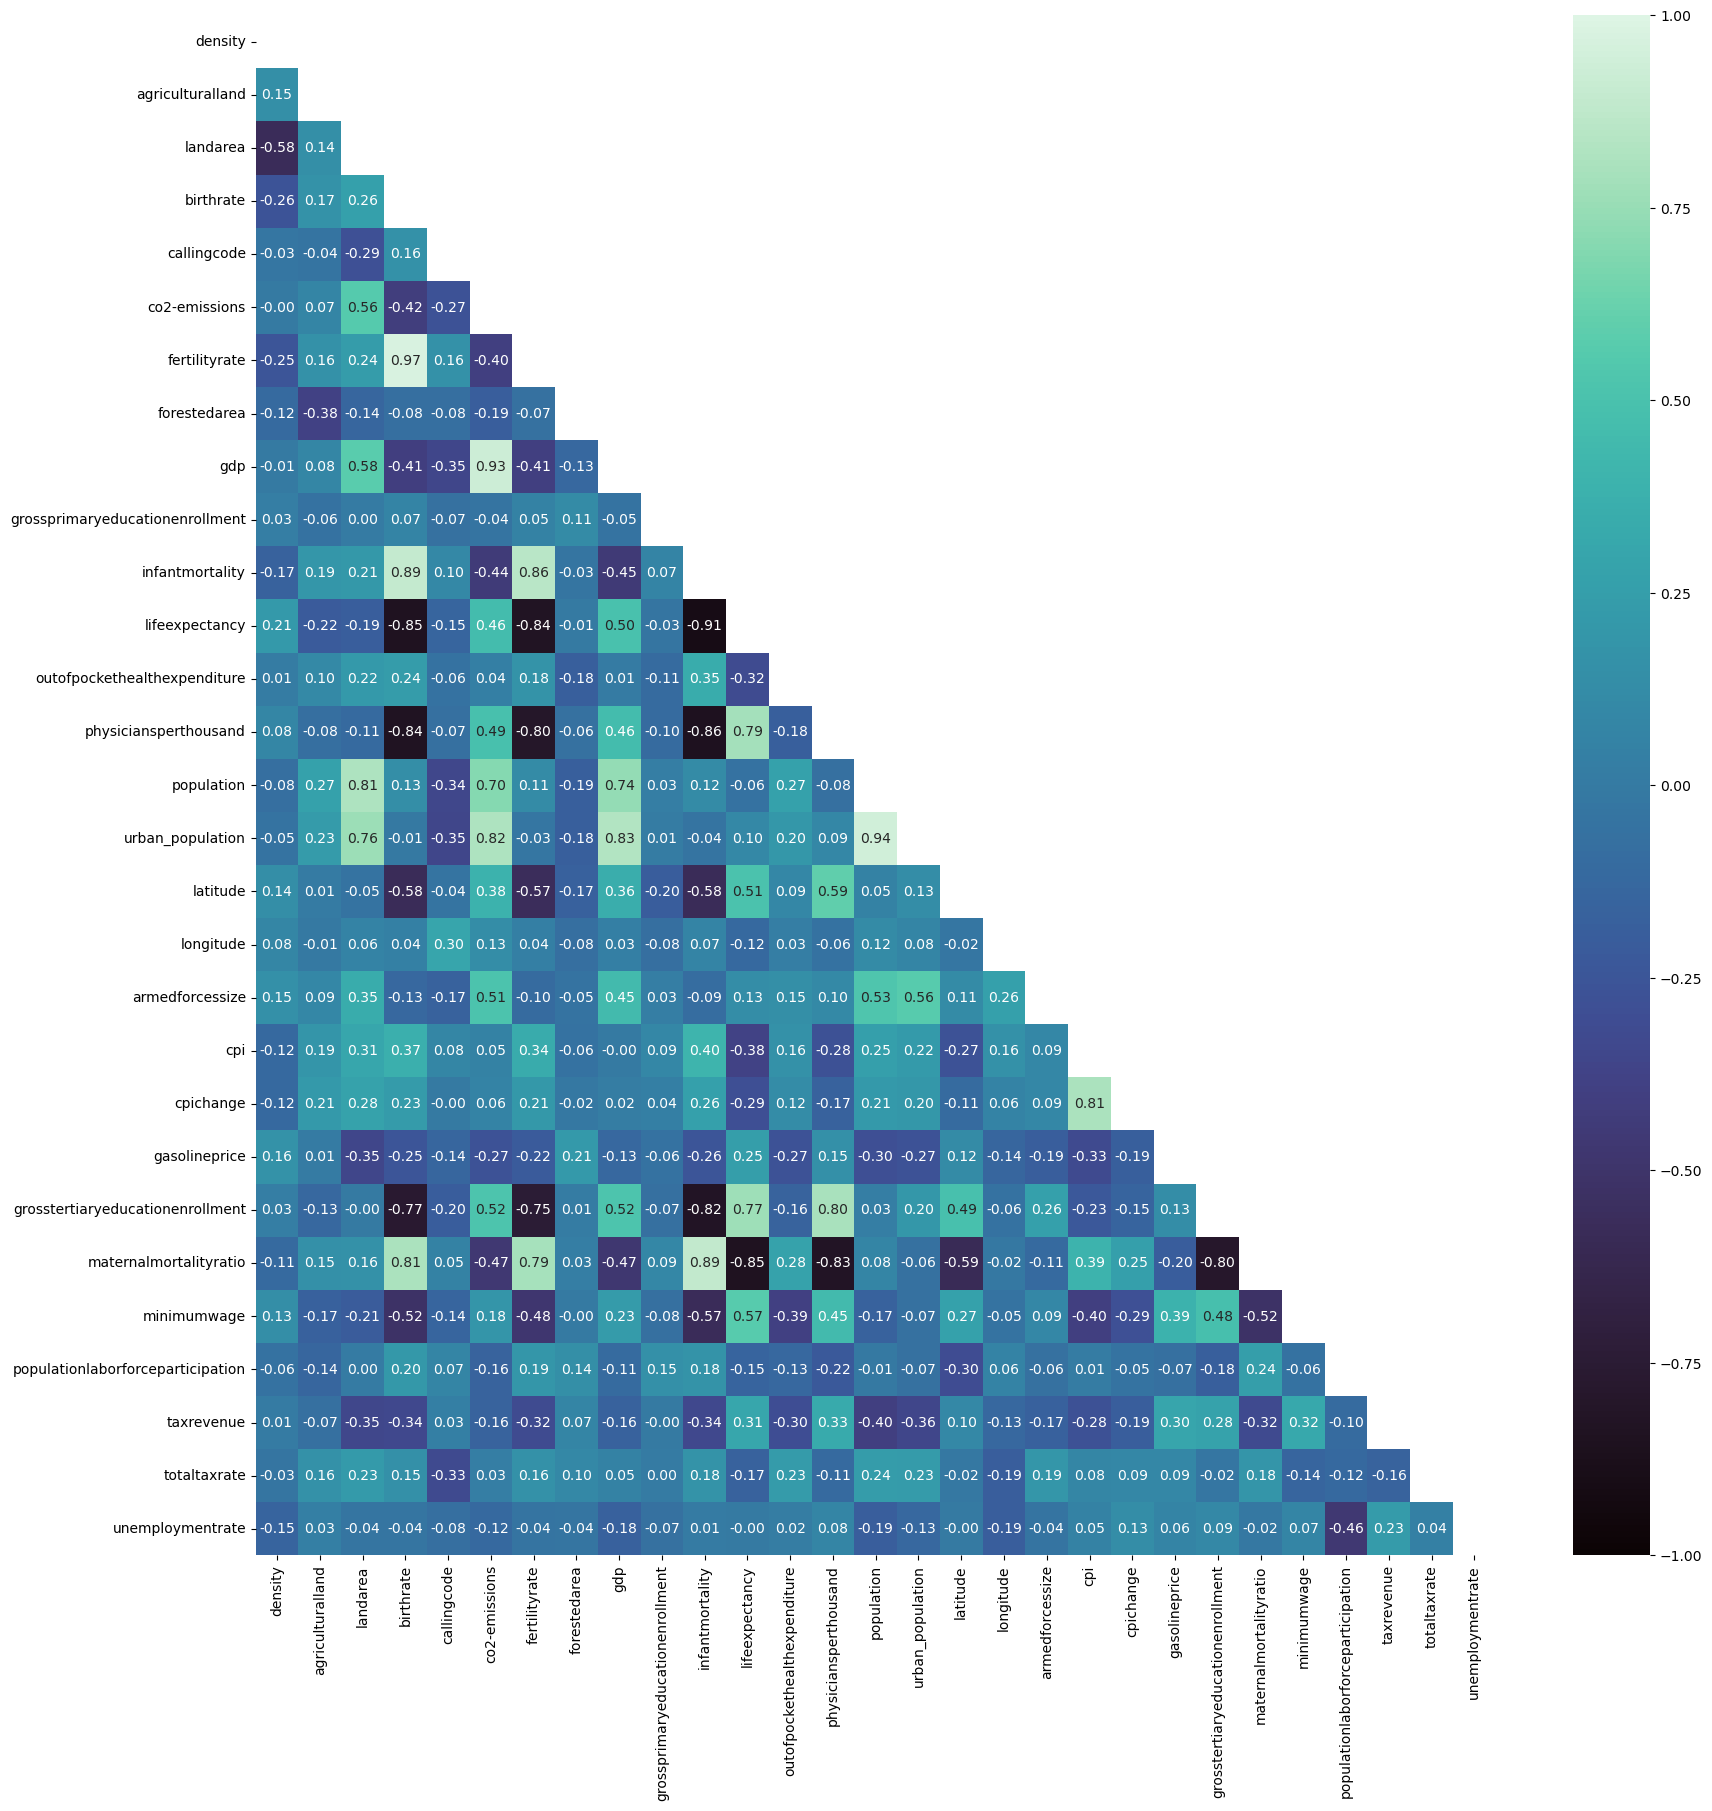

In [60]:
plt.figure(figsize = (20, 20))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

### top relaciones negativas 

- Life expectancy: relación totalmente negativa con : birthrate, fertilityrate e infant mortality. 
- Gross terciary educational enrollment: tiene relación negativa con birthrate, fertility rate, infantmortality. 
- Maternal Mortality Ratio: relación negativa con life expectancy, physicians per thousand, gross terciary educational enrollment 
 

### Top relaciones positivas: 

- infant mortality con: birthrate, fertility rate. 
- Urban population: co2 emissions, gdp y population. 
- maternal mortality ratio: birthrate, fertility rate e infant mortality. 